In [1]:
import os
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

os.chdir('..')

from parameters import PtBinning, AK8TaggerWP

hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [2]:
folders = {
    '2016-PreVFP'  : '2016ULPre-VFP_FIXED_fixbkg',
    '2016-PostVFP' : '2016ULPost-VFP_FIXED_fixbkg',
    '2017'         : '2017UL_FIXED_fixbkg',
    '2018'         : '2018UL_FIXED_fixbkg'
}

filename = "/work/mmarcheg/BTVNanoCommissioning/fitdir/2016ULPre-VFP/msd100tau06btagDDCvLV2Hwp/fitResultsHwp.csv"
df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', 'c_cc', 'c_ccErrUp', 'c_ccErrDown'])
df = df[df['pt'] != 'Inclusive']
df

,year,campaign,selection,wp,pt,c_cc,c_ccErrUp,c_ccErrDown
1,2016,UL,msd100tau06,H,L,1.076111,0.923889,1.076111
2,2016,UL,msd100tau06,H,M,1.038275,0.107033,0.106758
3,2016,UL,msd100tau06,H,H,0.985663,0.165914,0.157367


btagDDBvLV2
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  L  L  1.052684   0.024204     0.024107
2  2016       UL  msd100tau06  L  M  1.026978   0.037817     0.037156
3  2016       UL  msd100tau06  L  H  0.982526   0.058872     0.056811
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  M  L  1.047573   0.034468     0.033323
2  2016       UL  msd100tau06  M  M  1.028953   0.054733     0.053507
3  2016       UL  msd100tau06  M  H  1.025007   0.086503     0.082559
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  H  L  1.049924   0.056080     0.054454
2  2016       UL  msd100tau06  H  M  1.046034   0.082874     0.079318
3  2016       UL  msd100tau06  H  H  1.023203   0.153393     0.140195
btagDDCvLV2
   year campaign    selection wp pt      c_cc  c_ccErrUp  c_ccErrDown
1  2016       UL  msd100tau06  L  L  0.987698   0.039261     0.039

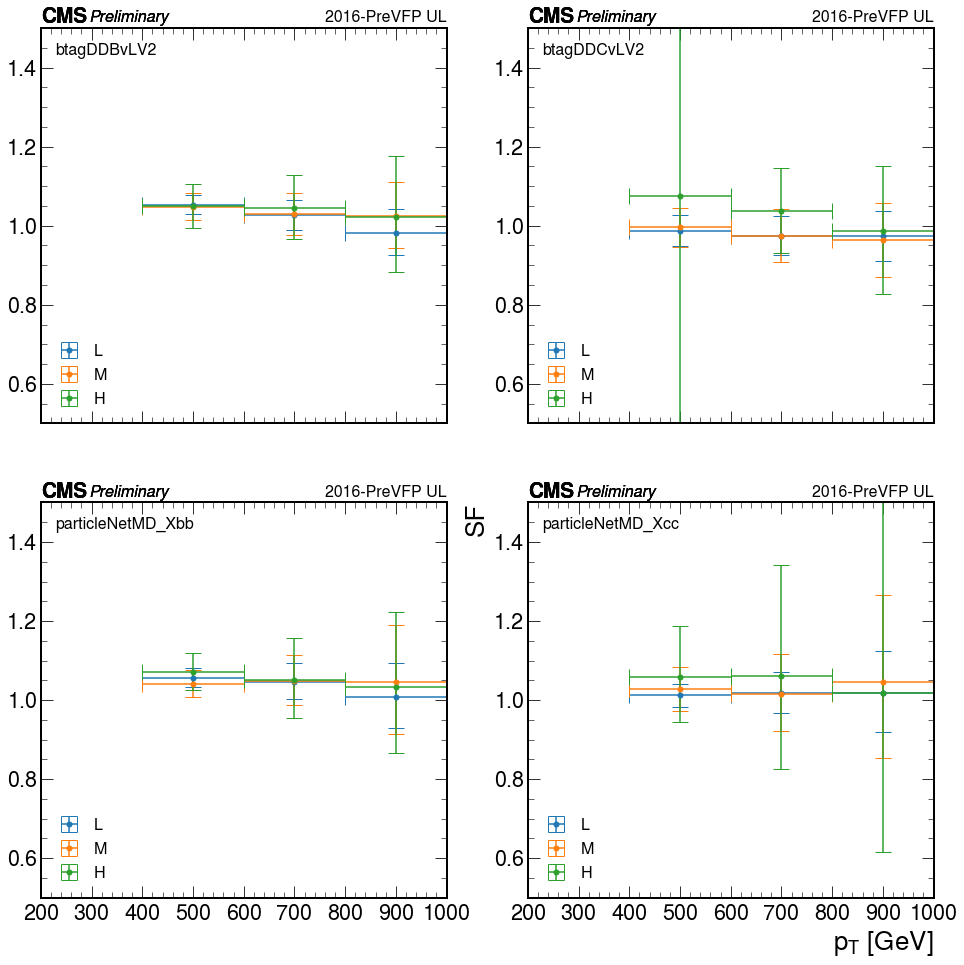

btagDDBvLV2
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  L  L  0.961978   0.020497     0.020446
2  2016       UL  msd100tau06  L  M  0.976939   0.037520     0.036729
3  2016       UL  msd100tau06  L  H  0.975340   0.065727     0.062817
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  M  L  0.954964   0.030238     0.029951
2  2016       UL  msd100tau06  M  M  0.984069   0.052352     0.050745
3  2016       UL  msd100tau06  M  H  0.983520   0.101334     0.096166
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2016       UL  msd100tau06  H  L  0.976723   0.051254     0.050268
2  2016       UL  msd100tau06  H  M  0.985678   0.085071     0.081015
3  2016       UL  msd100tau06  H  H  0.982998   0.194811     0.174072
btagDDCvLV2
   year campaign    selection wp pt      c_cc  c_ccErrUp  c_ccErrDown
1  2016       UL  msd100tau06  L  L  1.010778   0.038206     0.038

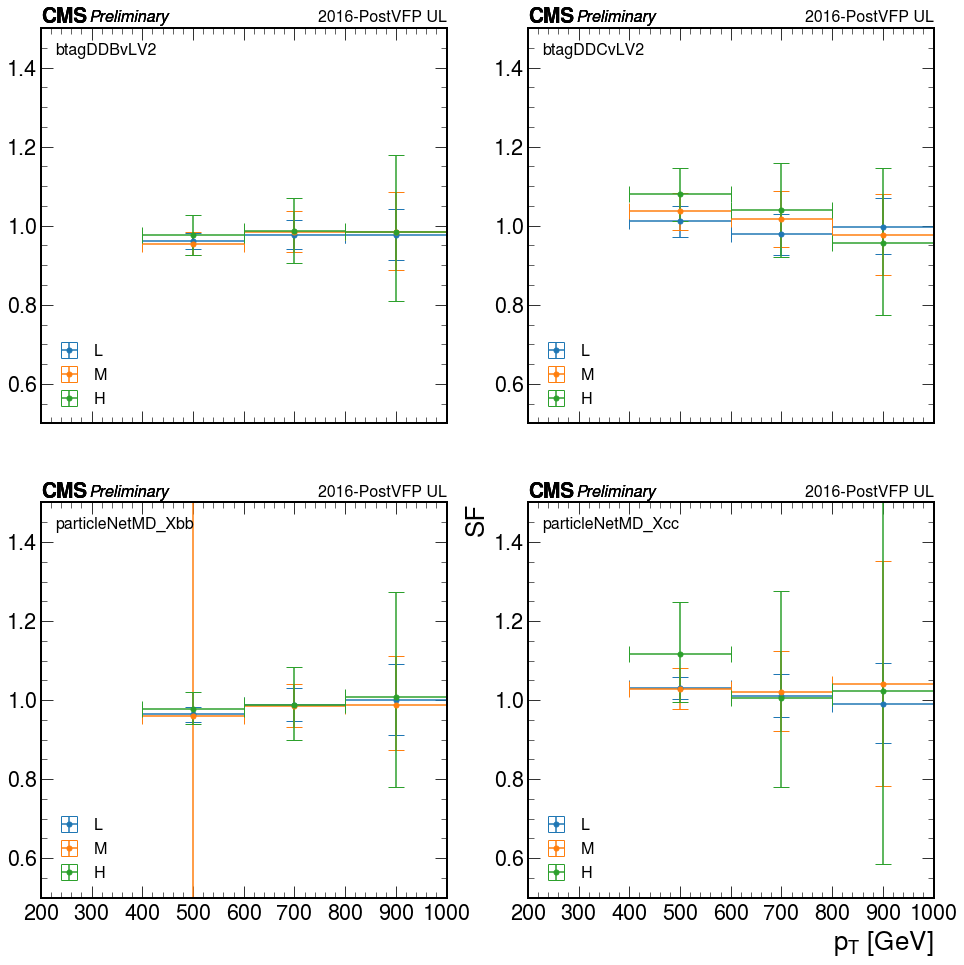

btagDDBvLV2
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2017       UL  msd100tau06  L  L  0.916921   0.064433     0.062007
2  2017       UL  msd100tau06  L  M  1.137651   0.087096     0.084536
3  2017       UL  msd100tau06  L  H  1.264767   0.085646     0.080768
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2017       UL  msd100tau06  M  L  0.957060   0.091135     0.083617
2  2017       UL  msd100tau06  M  M  1.283067   0.109466     0.101243
3  2017       UL  msd100tau06  M  H  1.078647   0.108388     0.100182
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2017       UL  msd100tau06  H  L  1.752864   0.247136     0.220709
2  2017       UL  msd100tau06  H  H  1.038978   0.144021     0.132344

2017UL btagDDBvLV2 H WP: 1 datapoints are missing. Available pt:['L' 'H']

btagDDCvLV2
   year campaign    selection wp pt      c_cc  c_ccErrUp  c_ccErrDown
1  2017       UL  msd100tau06  L  L  1.060938   0.050834    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



2017UL particleNetMD_Xcc H WP: -2 datapoints are missing. Available pt:['L' 'H' 'L' 'M' 'H']



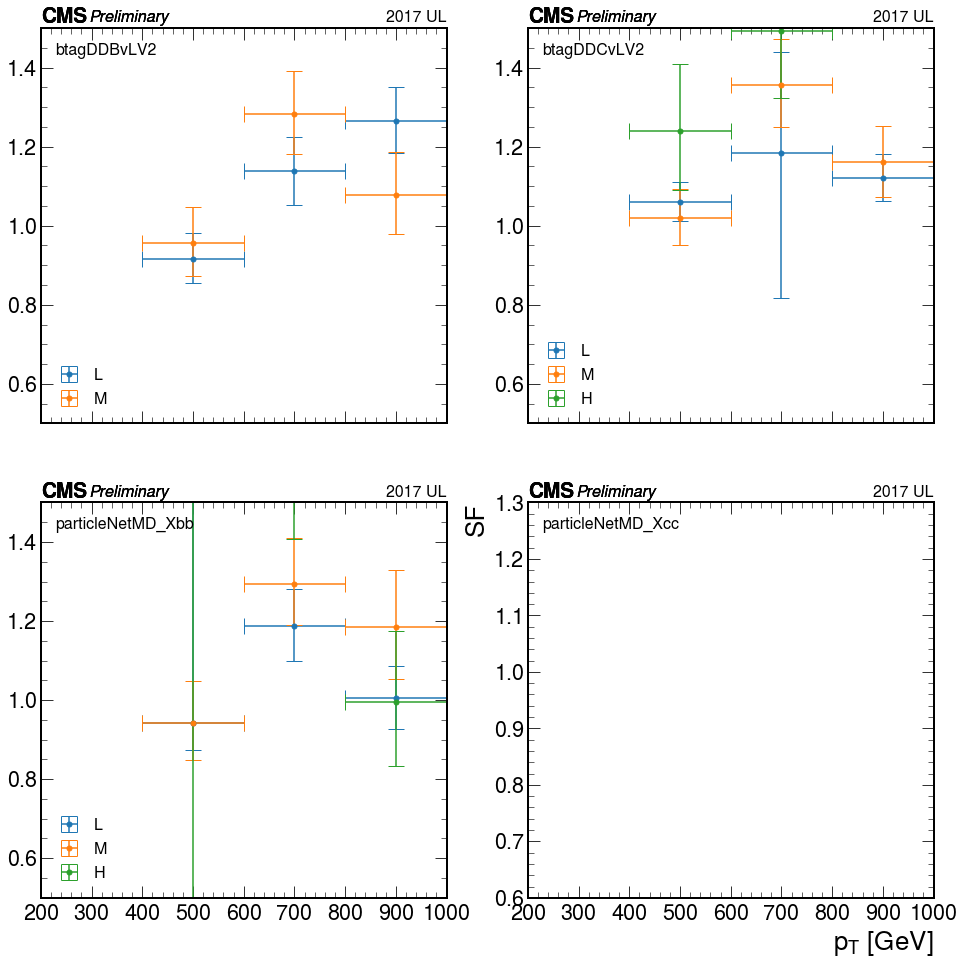

btagDDBvLV2
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2018       UL  msd100tau06  L  L  1.106208   0.020955     0.020703
2  2018       UL  msd100tau06  L  M  1.019080   0.026410     0.026455
3  2018       UL  msd100tau06  L  H  1.003572   0.042263     0.041586
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2018       UL  msd100tau06  M  L  1.067090   0.932910     1.067090
2  2018       UL  msd100tau06  M  M  1.031585   0.036393     0.035747
3  2018       UL  msd100tau06  M  H  1.002983   0.058539     0.056476
   year campaign    selection wp pt      b_bb  b_bbErrUp  b_bbErrDown
1  2018       UL  msd100tau06  H  L  1.082621   0.046852     0.045565
2  2018       UL  msd100tau06  H  M  1.025165   0.057045     0.055128
3  2018       UL  msd100tau06  H  H  0.995535   0.105482     0.099015
btagDDCvLV2
   year campaign    selection wp pt      c_cc  c_ccErrUp  c_ccErrDown
1  2018       UL  msd100tau06  L  L  1.008013   0.033156     0.032

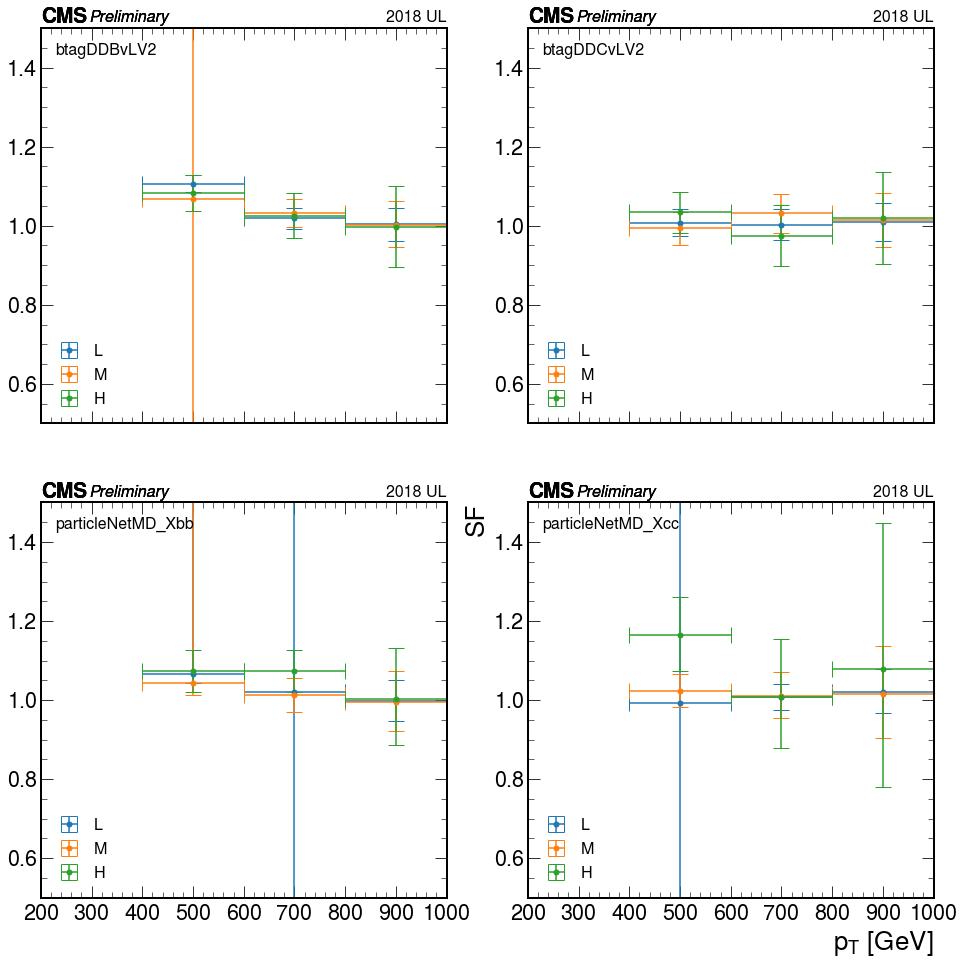

In [3]:
fontsize = 16

for key in folders.keys():
    folder = folders[key]
    year = key.split('-')[0]
    fig, axes = plt.subplots(2,2, figsize=[16,16], sharex=True)
    plt.xlim(200, 1000)
    plt.ylim(0.6, 1.3)
    plt.xticks(np.arange(200, 1100, 100))
    plt.xlabel(r"p$_T$ [GeV]")
    plt.ylabel("SF")
    for i, tagger in enumerate(AK8TaggerWP['UL'][year].keys()):
        text = tagger
        at = AnchoredText(text, loc='upper left', prop={'fontsize' : fontsize}, frameon=False)
        axes[int(i/2)][i%2].add_artist(at)
        print(tagger)
        for wp in [ 'L', 'M', 'H' ]:
            
            SF = None
            SFerr = None

            if ('DDC' in tagger) | ('Xcc' in tagger):
                POI = 'c_cc'
            elif ('DDB' in tagger) | ('Xbb' in tagger):
                POI = 'b_bb'

            filename = f"/work/mmarcheg/BTVNanoCommissioning/fitdir/{folder}/msd100tau06{tagger}{wp}wp/fitResults{wp}wp.csv"
            #df = pd.read_csv(filename)
            #print(df)
            df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', f'{POI}', f'{POI}ErrUp', f'{POI}ErrDown'])
            #try: df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', f'{POI}', f'{POI}ErrUp', f'{POI}ErrDown'])
            #except: print(filename)
            df = df[df['pt'] != 'Inclusive']
            print(df)

            year = str(df['year'].values[0])
            campaign = df['campaign'].values[0]
            axes[int(i/2),i%2].set_title(f'{key} {campaign}', loc='right', fontsize=fontsize)
            hep.cms.text("Preliminary", ax=axes[int(i/2),i%2], loc=0, fontsize=fontsize)
            ptbinning = PtBinning[campaign][year]

            SF = df[POI].values
            SFerr = np.array( (df[f'{POI}ErrDown'].values, df[f'{POI}ErrUp'].values) )

            pt = []
            pterr = []
            for wpt in ptbinning.keys():
                if wpt == 'M+H': continue
                pt_low, pt_high = ptbinning[wpt]
                if 'H' in wpt:
                    pt_center = 900
                else:
                    pt_center = np.mean((pt_low, pt_high))
                pt_err = pt_center - pt_low
                pt.append(pt_center)
                pterr.append(pt_err)
                
            if len(SF) != len(pt):
                print(f"\n{year}{campaign} {tagger} {wp} WP: {len(pt) - len(SF)} datapoints are missing. Available pt:", end='')
                print(df['pt'].values, end='\n\n')
                continue
            
            axes[int(i/2),i%2].errorbar(pt, SF, xerr=pterr, yerr=SFerr, capsize=8, linestyle='', marker='o', markersize=5, label=wp)
            axes[int(i/2),i%2].set_ylim(0.5, 1.5)
        axes[int(i/2),i%2].legend(loc="lower left", fontsize=fontsize)
        #plt.show()
        #axes[i/2,i%2].close()
    plt.show()
    plt.close()

In [4]:
hep.cms.text?